<a href="https://colab.research.google.com/github/NajlaFairuzAzzahra/Implementasi-Interpolasi_MetodeNumerik_NajlaFairuz/blob/main/Implementasi_Interpolasi_MetodeNumerik_NajlaFairuz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementasi Interpolasi

Interpolasi Lagrange di x = 27.5: 13.5009765625


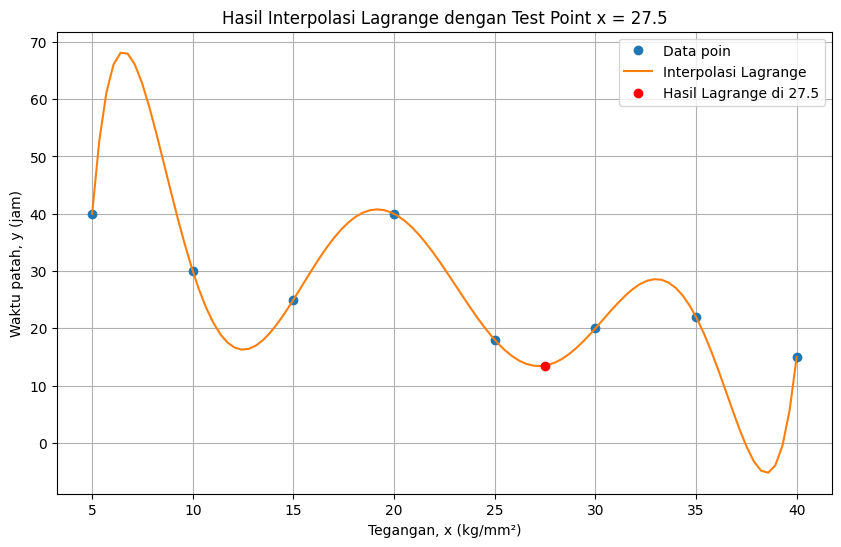

Interpolasi Newton di x = 40: 15.000000000000526


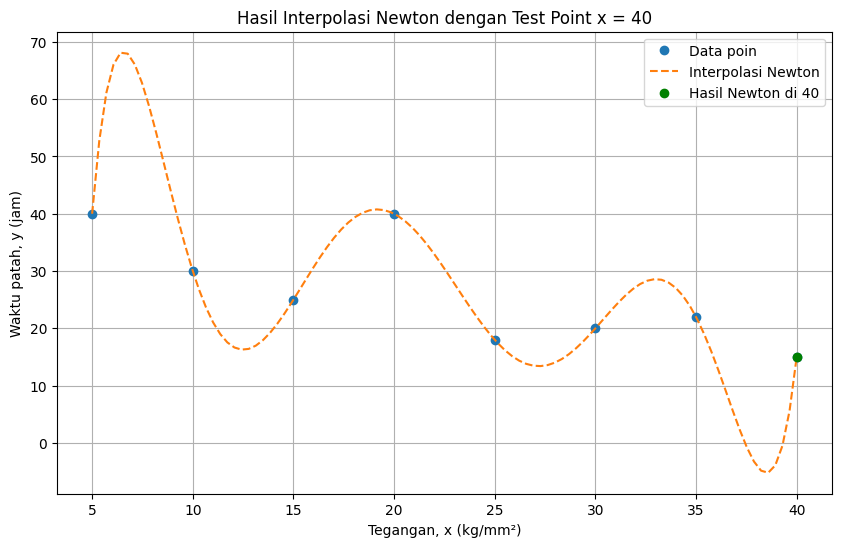

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Interpolasi Lagrange
def lagrange_interpolation(x, y, value):
    result = 0.0
    n = len(x)
    for i in range(n):
        term = y[i]
        for j in range(n):
            if j != i:
                term *= (value - x[j]) / (x[i] - x[j])
        result += term
    return result

# Interpolasi Newton
def divided_diff(x, y):
    n = len(y)
    coef = np.zeros([n, n])
    coef[:, 0] = y

    for j in range(1, n):
        for i in range(n-j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j] - x[i])

    return coef[0, :]

def newton_interpolation(x, y, value):
    coef = divided_diff(x, y)
    n = len(x)
    result = coef[-1]
    for i in range(n-2, -1, -1):
        result = result * (value - x[i]) + coef[i]
    return result

# Fungsi untuk testing dan plotting Lagrange
def interpolate_and_plot_lagrange(x_lagrange, y_lagrange, test_point):
    lagrange_result = lagrange_interpolation(x_lagrange, y_lagrange, test_point)

    print(f"Interpolasi Lagrange di x = {test_point}: {lagrange_result}")

    # Membuat data untuk plotting
    x_values = np.linspace(min(x_lagrange), max(x_lagrange), 100)
    lagrange_values = [lagrange_interpolation(x_lagrange, y_lagrange, val) for val in x_values]

    # Plot hasilnya
    plt.figure(figsize=(10, 6))
    plt.plot(x_lagrange, y_lagrange, 'o', label='Data poin')
    plt.plot(x_values, lagrange_values, label='Interpolasi Lagrange')
    plt.scatter(test_point, lagrange_result, color='red', zorder=5, label=f'Hasil Lagrange di {test_point}')
    plt.xlabel('Tegangan, x (kg/mm²)')
    plt.ylabel('Waktu patah, y (jam)')
    plt.legend()
    plt.title(f'Hasil Interpolasi Lagrange dengan Test Point x = {test_point}')
    plt.grid(True)
    plt.show()

# Fungsi untuk testing dan plotting Newton
def interpolate_and_plot_newton(x_newton, y_newton, test_point):
    newton_result = newton_interpolation(x_newton, y_newton, test_point)

    print(f"Interpolasi Newton di x = {test_point}: {newton_result}")

    # Membuat data untuk plotting
    x_values = np.linspace(min(x_newton), max(x_newton), 100)
    newton_values = [newton_interpolation(x_newton, y_newton, val) for val in x_values]

    # Plot hasilnya
    plt.figure(figsize=(10, 6))
    plt.plot(x_newton, y_newton, 'o', label='Data poin')
    plt.plot(x_values, newton_values, label='Interpolasi Newton', linestyle='--')
    plt.scatter(test_point, newton_result, color='green', zorder=5, label=f'Hasil Newton di {test_point}')
    plt.xlabel('Tegangan, x (kg/mm²)')
    plt.ylabel('Waktu patah, y (jam)')
    plt.legend()
    plt.title(f'Hasil Interpolasi Newton dengan Test Point x = {test_point}')
    plt.grid(True)
    plt.show()

# Data untuk interpolasi Lagrange
x_lagrange = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y_lagrange = np.array([40, 30, 25, 40, 18, 20, 22, 15])

# Data untuk interpolasi Newton
x_newton = np.array([5, 10, 15, 20, 25, 30, 35, 40])
y_newton = np.array([40, 30, 25, 40, 18, 20, 22, 15])

# Contoh pemanggilan
interpolate_and_plot_lagrange(x_lagrange, y_lagrange, 27.5)
interpolate_and_plot_newton(x_newton, y_newton, 40)
